# Лабораторная работа №1.
Выполнил: студент группы ИДМ-24-07 Туркин Александр.

## Задание
Математическая модель Лотки-Вольтерры («хищник-жертва»)

 \begin{cases}
   \frac{dV}{dt}=(a-bP)V
   \\
   \frac{dP}{dt}=(-c+dV)P
 \end{cases}

<center>Задаваемые параметры</center>

P – количество хищников;  
V – количество жертв;  
t – время;  
a – вероятность рождаемости жертв;  
b – вероятность смертности жертв при встрече с хищником;  
c – вероятность убыли хищников при нехватке еды;  
d – вероятность достаточности еды для размножения хищников.

<center>Задание</center>  

1. Решить систему уравнений численно методом Рунге-Кутты 4 порядка 
точности  
2. Построить графики изменения динамики численности хищников V(t), и 
жертв P(t)  
3. Построить фазовую диаграмму (по оси Х – жертвы, по оси У – хищники)  
4. Найти стационарную точку (равновесное состояние, в общем виде)  
5. В выводах написать влияние каждого из коэффициентов (a, b, c, d) на 
систему  

## Решение


Для решения задачи по модели Лотки-Вольтерры, давайте поэтапно разберем каждую часть задания.

### 1. Численное решение системы уравнений методом Рунге-Кутты 4 порядка

Система уравнений:

$
\begin{cases}
   \frac{dV}{dt}=(a-bP)V \\
   \frac{dP}{dt}=(-c+dV)P
\end{cases}
$

1. Задаем начальные условия $ V(0) = V_0 $ и $ P(0) = P_0 $.
2. Выбираем шаг интегрирования $ h $ и количество шагов $ N $.
3. Для каждого шага $ n $:
   - Вычисляем $ k_1, k_2, k_3, k_4 $ для $ V $ и $ P $:  
   $
   k_{1V} = h \cdot (a - bP_n)V_n
   $  
   $
   k_{1P} = h \cdot (-c + dV_n)P_n
   $  
   $
   k_{2V} = h \cdot (a - b(P_n + \frac{k_{1P}}{2}))(V_n + \frac{k_{1V}}{2})
   $  
   $
   k_{2P} = h \cdot (-c + d(V_n + \frac{k_{1V}}{2}))(P_n + \frac{k_{1P}}{2})
   $  
   $
   k_{3V} = h \cdot (a - b(P_n + \frac{k_{2P}}{2}))(V_n + \frac{k_{2V}}{2})
   $  
   $
   k_{3P} = h \cdot (-c + d(V_n + \frac{k_{2V}}{2}))(P_n + \frac{k_{2P}}{2})
   $  
   $
   k_{4V} = h \cdot (a - b(P_n + k_{3P}))(V_n + k_{3V})
   $  
   $
   k_{4P} = h \cdot (-c + d(V_n + k_{3V}))(P_n + k_{3P})
   $  
   - Обновляем значения:  
   $
   V_{n+1} = V_n + \frac{1}{6}(k_{1V} + 2k_{2V} + 2k_{3V} + k_{4V})
   $  
   $
   P_{n+1} = P_n + \frac{1}{6}(k_{1P} + 2k_{2P} + 2k_{3P} + k_{4P})
   $  


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры
a = 0.1  # вероятность рождаемости жертв
b = 0.02  # вероятность смертности жертв при встрече с хищником
c = 0.1  # вероятность убыли хищников при нехватке еды
d = 0.01  # вероятность достаточности еды для размножения хищников

# Начальные условия
V0 = 40  # начальное количество жертв
P0 = 9   # начальное количество хищников

# Параметры интегрирования
h = 0.1  # шаг интегрирования
t_max = 200  # максимальное время
N = int(t_max / h)  # количество шагов

# Массивы для хранения значений
V = np.zeros(N)
P = np.zeros(N)
t = np.linspace(0, t_max, N)

# Начальные условия
V[0] = V0
P[0] = P0

# Метод Рунге-Кутты 4 порядка
for n in range(N - 1):
    k1V = h * (a - b * P[n]) * V[n]
    k1P = h * (-c + d * V[n]) * P[n]
    
    k2V = h * (a - b * (P[n] + k1P / 2)) * (V[n] + k1V / 2)
    k2P = h * (-c + d * (V[n] + k1V / 2)) * (P[n] + k1P / 2)
    
    k3V = h * (a - b * (P[n] + k2P / 2)) * (V[n] + k2V / 2)
    k3P = h * (-c + d * (V[n] + k2V / 2)) * (P[n] + k2P / 2)
    
    k4V = h * (a - b * (P[n] + k3P)) * (V[n] + k3V)
    k4P = h * (-c + d * (V[n] + k3V)) * (P[n] + k3P)
    
    V[n + 1] = V[n] + (k1V + 2 * k2V + 2 * k3V + k4V) / 6
    P[n + 1] = P[n] + (k1P + 2 * k2P + 2 * k3P + k4P) / 6


### 2. Построение графиков изменения динамики численности хищников и жертв

После численного решения системы уравнений, можно построить графики $ V(t) $ и $ P(t) $ с использованием библиотек для визуализации, таких как Matplotlib в Python.

### 3. Построение фазовой диаграммы

Фазовая диаграмма строится путем отображения значений $ V $ и $ P $ на плоскости. Это можно сделать, используя те же данные, которые были получены в процессе численного решения.

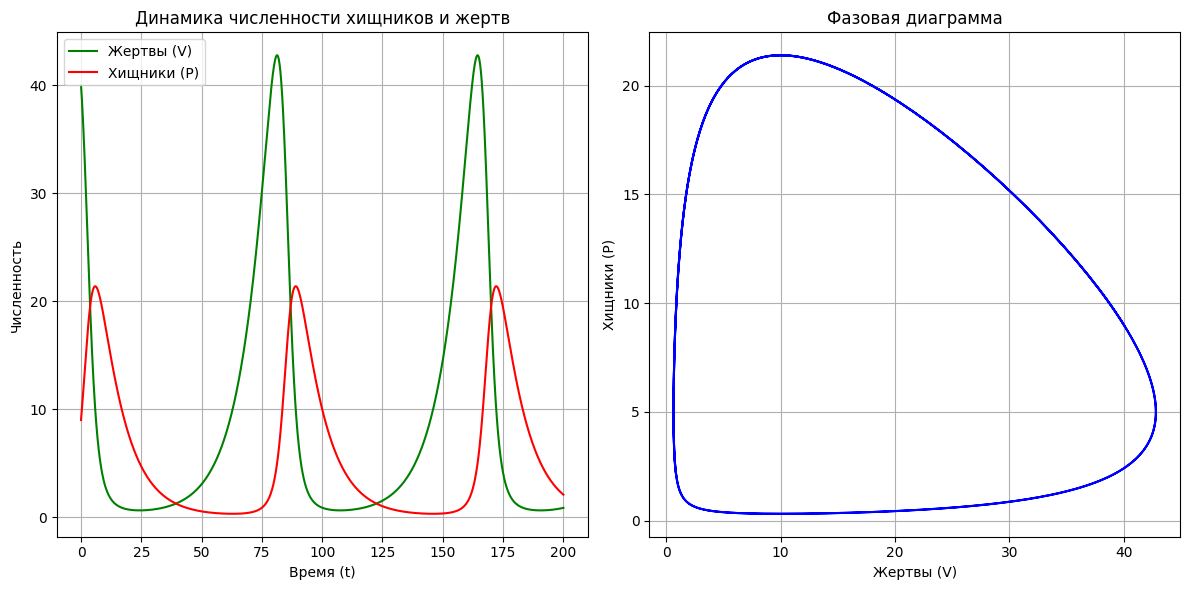

In [12]:
# Построение графиков
plt.figure(figsize=(12, 6))

# График динамики численности
plt.subplot(1, 2, 1)
plt.plot(t, V, label='Жертвы (V)', color='green')
plt.plot(t, P, label='Хищники (P)', color='red')
plt.title('Динамика численности хищников и жертв')
plt.xlabel('Время (t)')
plt.ylabel('Численность')
plt.legend()
plt.grid()

# Фазовая диаграмма
plt.subplot(1, 2, 2)
plt.plot(V, P, color='blue')
plt.title('Фазовая диаграмма')
plt.xlabel('Жертвы (V)')
plt.ylabel('Хищники (P)')
plt.grid()

plt.tight_layout()
plt.show()

### 4. Нахождение стационарной точки

Стационарные точки находятся приравнивании производных к нулю:

$
\begin{cases}
   (a - bP^*)V^* = 0 \\
   (-c + dV^*)P^* = 0
\end{cases}
$

Решая эти уравнения, мы можем найти равновесные состояния $ V^* $ и $ P^* $.


In [13]:
# Нахождение стационарных точек
def find_equilibrium_points(a, b, c, d):
    # Стационарная точка (V*, P*)
    # 1. Если V* = 0, то P* может быть любым (но обычно рассматриваем P* = 0)
    V_star_1 = 0
    P_star_1 = 0

    # 2. Если V* > 0, то a - bP* = 0 => P* = a/b
    P_star_2 = a / b if b != 0 else None
    V_star_2 = (c / d) if d != 0 else None  # из -c + dV* = 0 => V* = c/d

    return (V_star_1, P_star_1), (V_star_2, P_star_2)

# Получаем стационарные точки
equilibrium_points = find_equilibrium_points(a, b, c, d)

# Выводим результаты
for i, (V_star, P_star) in enumerate(equilibrium_points):
    print(f"Стационарная точка {i + 1}: V* = {V_star}, P* = {P_star}")

Стационарная точка 1: V* = 0, P* = 0
Стационарная точка 2: V* = 10.0, P* = 5.0



### 5. Выводы о влиянии коэффициентов

- **a (рождаемость жертв)**: Увеличение a приводит к росту численности жертв, что может увеличить и численность хищников.
- **b (смертность жертв)**: Увеличение b приводит к снижению численности жертв, что может привести к уменьшению численности хищников.
- **c (убыль хищников)**: Увеличение c приводит к снижению численности хищников, особенно при нехватке пищи.